# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [2]:
import pandas as pd

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds.head()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [3]:
in_casa_cara=ds['price'].idxmax()
dir_casa_cara=ds.loc[in_casa_cara, 'url_inmueble']
precio_casa_cara=ds.loc[in_casa_cara, 'price']
print(f"La casa con la direccion {dir_casa_cara} es la mas cara y su precio es {precio_casa_cara}USD")

La casa con la direccion https://www.fotocasa.es/es/comprar/vivienda/villaviciosa-de-odon/aire-acondicionado-calefaccion-parking-jardin-terraza-trastero-piscina-internet/144725475/d es la mas cara y su precio es 8500000USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [25]:
ds_filtrado = ds[ds['price'] > 0]
indice_casa_cara=ds_filtrado['price'].idxmin()
dir_casa_cara=ds.loc[in_casa_cara, 'realEstate_name']
precio_casa_cara=ds.loc[in_casa_cara, 'price']
print(f"La casa con la direccion {dir_casa_cara} es la mas barata y su precio es {precio_casa_cara}USD")

La casa con la direccion redpiso coslada es la mas barata y su precio es 600USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [33]:

indice_casa_grande = ds['surface'].idxmax()
indice_casa_pequena = ds['surface'].idxmin()
direccion_casa_grande = ds.loc[indice_casa_grande, 'url_inmueble']
superficie_casa_grande = ds.loc[indice_casa_grande, 'surface']
direccion_casa_pequena = ds.loc[indice_casa_pequena, 'url_inmueble']
superficie_casa_pequena = ds.loc[indice_casa_pequena, 'surface']
print(f"La casa más grande está ubicada en {direccion_casa_grande} y su superficie es de {superficie_casa_grande} metros cuadrados.")
print(f"La casa más pequeña está ubicada en {direccion_casa_pequena} y su superficie es de {superficie_casa_pequena} metros cuadrados.")

La casa más grande está ubicada en https://www.fotocasa.es/es/comprar/vivienda/madrid-capital/calefaccion-terraza-ascensor/153268668/d y su superficie es de 249000.0 metros cuadrados.
La casa más pequeña está ubicada en https://www.fotocasa.es/es/comprar/vivienda/madrid-capital/aire-acondicionado-calefaccion-trastero/153764741/d y su superficie es de 15.0 metros cuadrados.


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [41]:
poblaciones_unicas = ds['level5Id'].unique()
cantidad_poblaciones = len(poblaciones_unicas)
print(f"El dataset contiene {cantidad_poblaciones} poblaciones únicas en la columna 'level5Id'.")

El dataset contiene 1 poblaciones únicas en la columna 'level5Id'.


#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [35]:
columnas_con_nulos = ds.isnull().sum()
columnas_con_nulos = columnas_con_nulos[columnas_con_nulos > 0]
print("Columnas con valores nulos y la cantidad de valores nulos en cada una:")
print(columnas_con_nulos)

Columnas con valores nulos y la cantidad de valores nulos en cada una:
realEstate_name        10
phone_realEstate      794
rooms                 353
bathrooms             345
surface              1250
description           142
level4               6643
level6              14627
level7               2277
level8               8579
zipCode             15335
customZone          15335
dtype: int64


#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [44]:
dimensiones_antes = ds.shape
print(f"Dimensiones antes de eliminar NAs: {dimensiones_antes}")
ds_sin_nas = ds.dropna()
dimensiones_despues = ds_sin_nas.shape
print(f"Dimensiones después de eliminar NAs: {dimensiones_despues}")
print(f"El DataFrame original tenía {dimensiones_antes[0]} filas y {dimensiones_antes[1]} columnas.")
print(f"Después de eliminar los NAs, el DataFrame tiene {dimensiones_despues[0]} filas y {dimensiones_despues[1]} columnas.")


Dimensiones antes de eliminar NAs: (15335, 37)
Dimensiones después de eliminar NAs: (0, 37)
El DataFrame original tenía 15335 filas y 37 columnas.
Después de eliminar los NAs, el DataFrame tiene 0 filas y 37 columnas.


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [43]:
datos_arroyomolinos = ds[ds['level5'] == 'Arroyomolinos (Madrid)']
media_precio_arroyomolinos = datos_arroyomolinos['price'].mean()
print(f"La media de precios en Arroyomolinos (Madrid) es: {media_precio_arroyomolinos} USD")


La media de precios en Arroyomolinos (Madrid) es: 294541.59854014596 USD


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


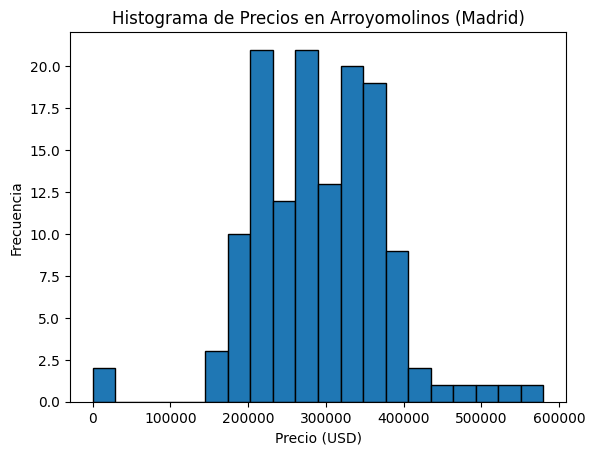

In [45]:
import matplotlib.pyplot as plt

# Crear el histograma de los precios para "Arroyomolinos (Madrid)"
plt.hist(datos_arroyomolinos['price'], bins=20, edgecolor='black')
plt.title('Histograma de Precios en Arroyomolinos (Madrid)')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.show()

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [46]:
datos_valdemorillo = ds[ds['level5'] == 'Valdemorillo']
datos_galapagar = ds[ds['level5'] == 'Galapagar']
media_precio_valdemorillo = datos_valdemorillo['price'].mean()
media_precio_galapagar = datos_galapagar['price'].mean()
print(f"El precio promedio en Valdemorillo es: {media_precio_valdemorillo} USD")
print(f"El precio promedio en Galapagar es: {media_precio_galapagar} USD")
if media_precio_valdemorillo == media_precio_galapagar:
    print("Los precios promedios en Valdemorillo y Galapagar son los mismos.")
else:
    print("Los precios promedios en Valdemorillo y Galapagar son diferentes.")

El precio promedio en Valdemorillo es: 363860.2931034483 USD
El precio promedio en Galapagar es: 360063.20238095237 USD
Los precios promedios en Valdemorillo y Galapagar son diferentes.


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [50]:
ds['pps'] = ds['price'] / ds['surface']
datos_valdemorillo = ds[ds['level5'] == 'Valdemorillo']
datos_galapagar = ds[ds['level5'] == 'Galapagar']
media_pps_valdemorillo = datos_valdemorillo['pps'].mean()
media_pps_galapagar = datos_galapagar['pps'].mean()
print(f"El precio por metro cuadrado promedio en Valdemorillo es: {media_pps_valdemorillo} USD/m2")
print(f"El precio por metro cuadrado promedio en Galapagar es: {media_pps_galapagar} USD/m2")
if media_pps_valdemorillo == media_pps_galapagar:
    print("Los promedios de precio por metro cuadrado en Valdemorillo y Galapagar son los mismos.")
else:
    print("Los promedios de precio por metro cuadrado en Valdemorillo y Galapagar son diferentes.")

El precio por metro cuadrado promedio en Valdemorillo es: 1317.9502109024986 USD/m2
El precio por metro cuadrado promedio en Galapagar es: 1606.3240303094024 USD/m2
Los promedios de precio por metro cuadrado en Valdemorillo y Galapagar son diferentes.


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

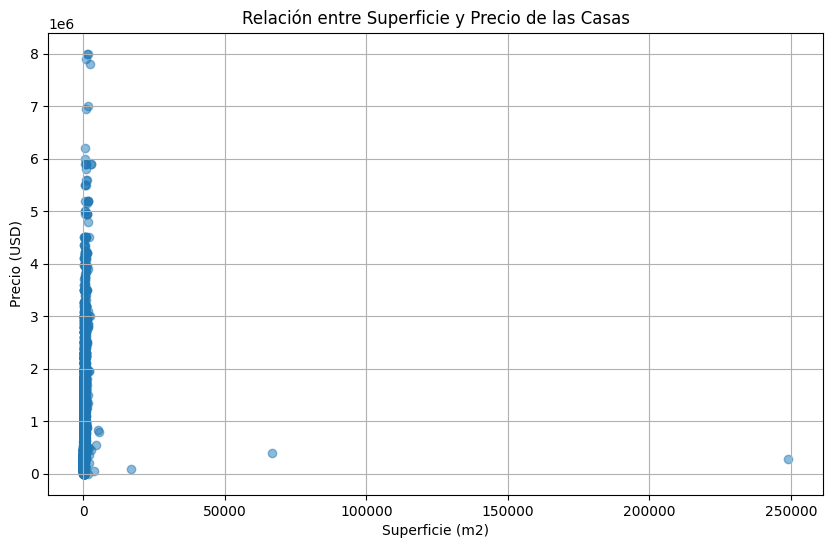

No se entiende nada porque los puntos quedaron mal distribuidos, no se si debiddo al error que arrastro desde mas arriba donde los precios de la casa me parecen desorbitantes o por que


In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(ds['surface'], ds['price'], alpha=0.5)
plt.title('Relación entre Superficie y Precio de las Casas')
plt.xlabel('Superficie (m2)')
plt.ylabel('Precio (USD)')
plt.grid(True)
plt.show()
print('No se entiende nada porque los puntos quedaron mal distribuidos, no se si debiddo al error que arrastro desde mas arriba donde los precios de la casa me parecen desorbitantes o por que')

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [49]:
agencias_unicas = ds['realEstate_name'].nunique()
print(f"El dataset contiene {agencias_unicas} agencias de bienes raíces únicas.")


El dataset contiene 1821 agencias de bienes raíces únicas.


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [55]:
poblacion_con_mas_casas = ds['level5'].value_counts().idxmax()
cantidad_casas = ds['level5'].value_counts().max()
print(f"La población con la mayor cantidad de casas es {poblacion_con_mas_casas} con {cantidad_casas} casas.")

La población con la mayor cantidad de casas es  Madrid Capital con 6643 casas.


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [56]:
cinturon_sur = ds[ds['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])]
print(cinturon_sur.head())

     Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
1             2       153867863  False  tecnocasa fuenlabrada ferrocarril   
3             4       152776331  False  tecnocasa fuenlabrada ferrocarril   
85           86       153152077  False            sinergical inmobiliaria   
94           95       153995577  False                    viviendas365com   
109         110       153586414  False    area uno asesores inmobiliarios   

     phone_realEstate                                       url_inmueble  \
1         916358736.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
3         916358736.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
85                NaN  https://www.fotocasa.es/es/comprar/vivienda/le...   
94        911226014.0  https://www.fotocasa.es/es/comprar/vivienda/le...   
109       912664081.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   

     rooms  bathrooms  surface   price  ... level5Id level6Id level7Id  \
1     

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

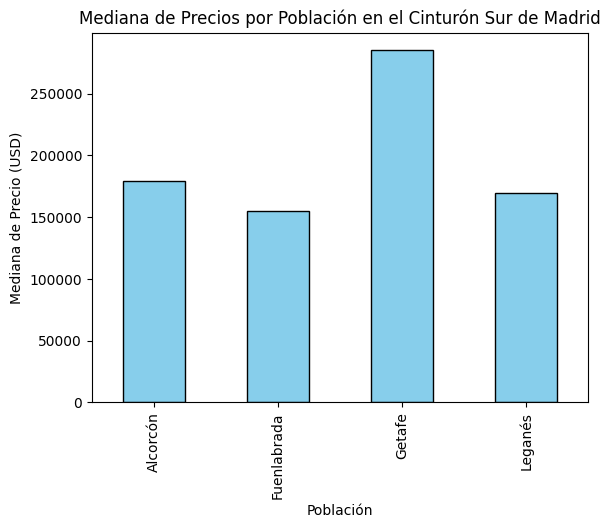

In [57]:
mediana_precios = cinturon_sur.groupby('level5')['price'].median()
mediana_precios.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mediana de Precios por Población en el Cinturón Sur de Madrid')
plt.xlabel('Población')
plt.ylabel('Mediana de Precio (USD)')
plt.show()

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [58]:
medias = cinturon_sur[['price', 'rooms', 'surface', 'bathrooms']].mean()
varianzas = cinturon_sur[['price', 'rooms', 'surface', 'bathrooms']].var()
print("Media de las variables:")
print(medias)
print("\nVarianza de las variables:")
print(varianzas)

Media de las variables:
price        223094.480706
rooms             3.017738
surface         111.752224
bathrooms         1.633222
dtype: float64

Varianza de las variables:
price        1.492137e+10
rooms        7.188859e-01
surface      4.263052e+03
bathrooms    5.717969e-01
dtype: float64


#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [59]:
casas_mas_caras = cinturon_sur.loc[cinturon_sur.groupby('level5')['price'].idxmax()]
print(casas_mas_caras[['level5', 'price', 'url_inmueble']])

            level5    price                                       url_inmueble
5585      Alcorcón   950000  https://www.fotocasa.es/es/comprar/vivienda/ca...
11561  Fuenlabrada   490000  https://www.fotocasa.es/es/comprar/vivienda/va...
2881        Getafe  1050000  https://www.fotocasa.es/es/comprar/vivienda/ma...
10412      Leganés   650000  https://www.fotocasa.es/es/comprar/vivienda/co...


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

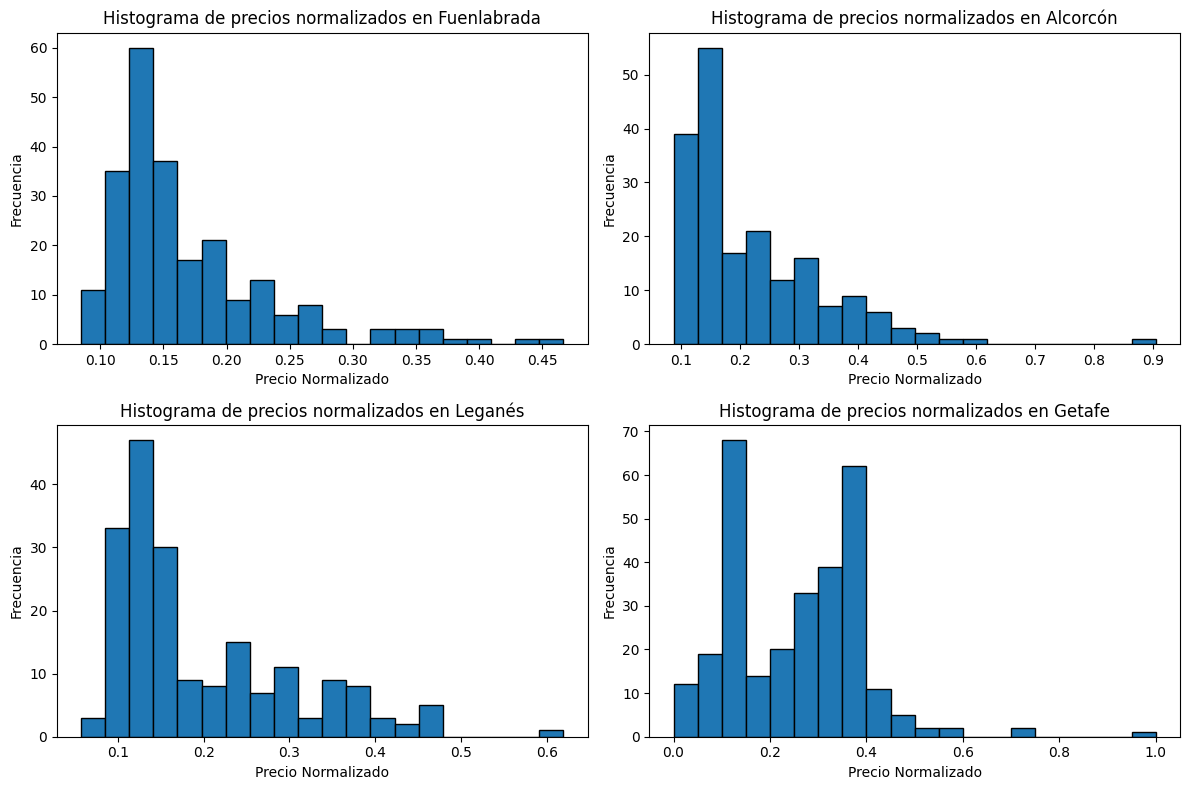

In [65]:
cinturon_sur.loc[:, 'price_normalized'] = scaler.fit_transform(cinturon_sur[['price']])
plt.figure(figsize=(12, 8))

for i, poblacion in enumerate(cinturon_sur['level5'].unique(), 1):
    plt.subplot(2, 2, i)
    subset = cinturon_sur[cinturon_sur['level5'] == poblacion]
    plt.hist(subset['price_normalized'], bins=20, edgecolor='black')
    plt.title(f'Histograma de precios normalizados en {poblacion}')
    plt.xlabel('Precio Normalizado')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

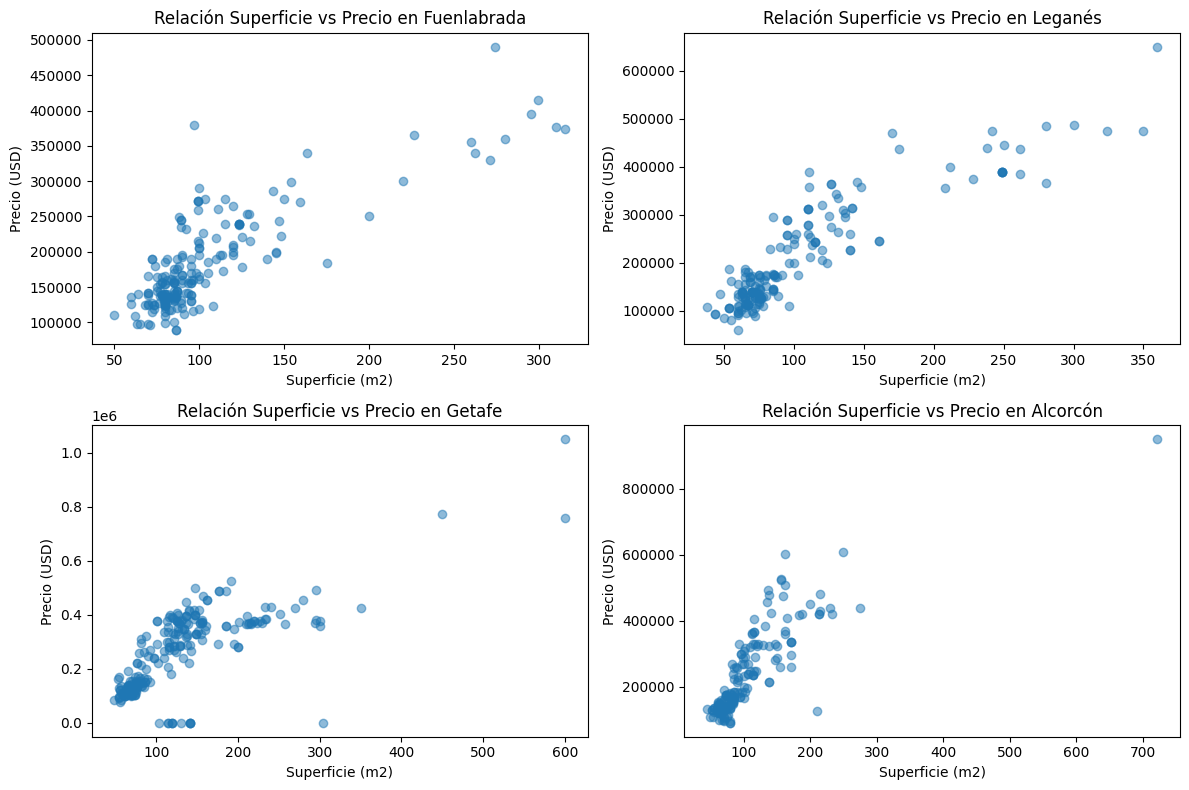

In [63]:
poblaciones = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
plt.figure(figsize=(12, 8))
for i, poblacion in enumerate(poblaciones, 1):
    plt.subplot(2, 2, i)
    subset = cinturon_sur[cinturon_sur['level5'] == poblacion]
    plt.scatter(subset['surface'], subset['price'], alpha=0.5)
    plt.title(f'Relación Superficie vs Precio en {poblacion}')
    plt.xlabel('Superficie (m2)')
    plt.ylabel('Precio (USD)')

plt.tight_layout()
plt.show()

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

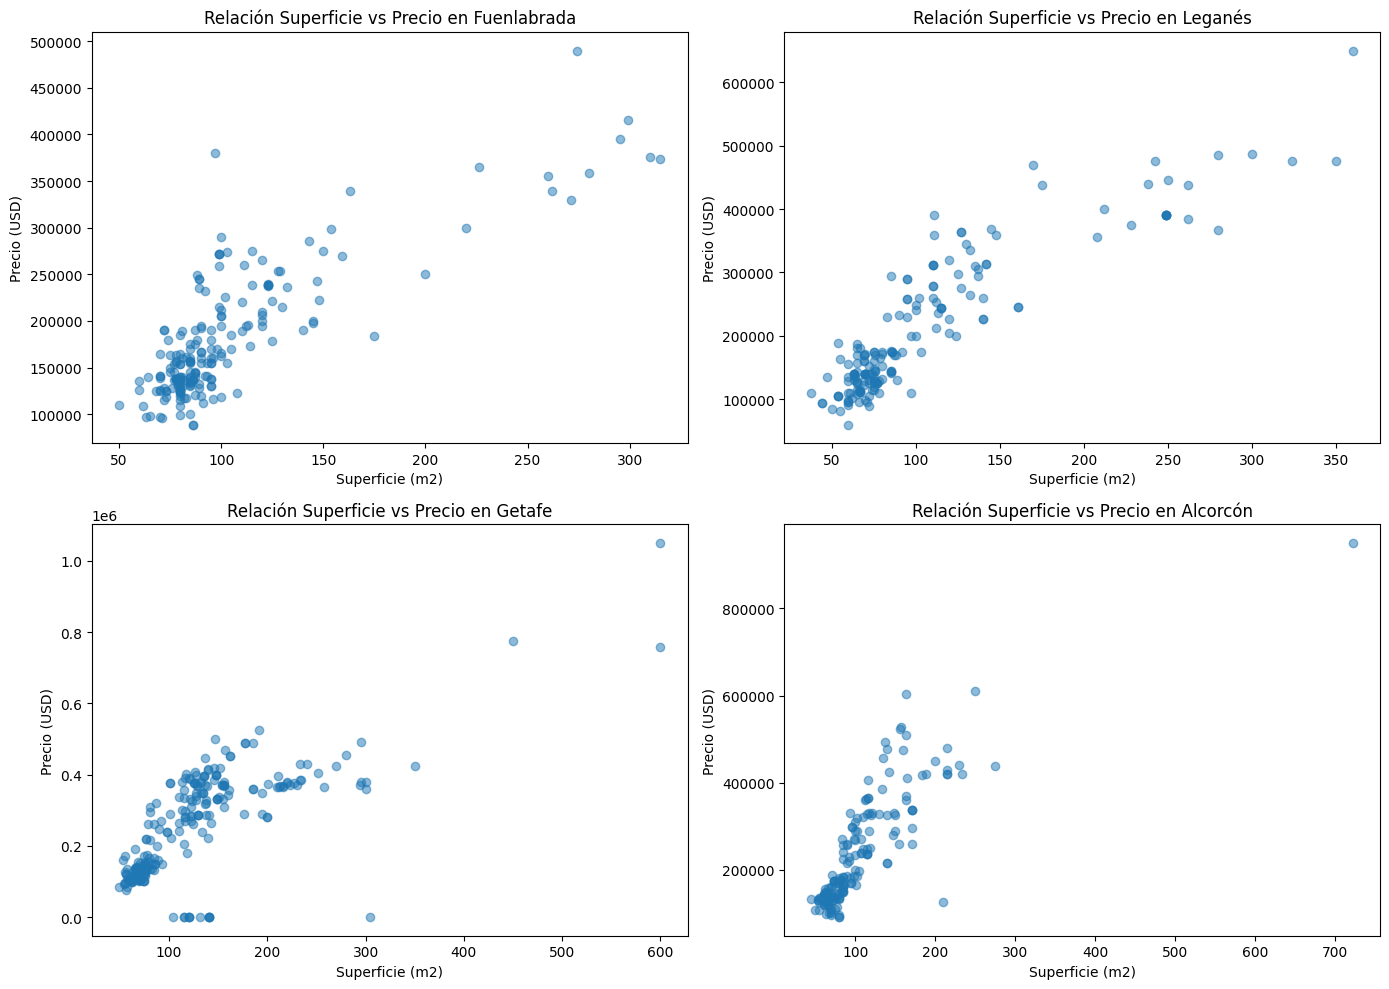

In [64]:
poblaciones = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']


plt.figure(figsize=(14, 10))

for i, poblacion in enumerate(poblaciones, 1):
    plt.subplot(2, 2, i)  # Crear un subplot de 2x2
    subset = cinturon_sur[cinturon_sur['level5'] == poblacion]
    plt.scatter(subset['surface'], subset['price'], alpha=0.5)
    plt.title(f'Relación Superficie vs Precio en {poblacion}')
    plt.xlabel('Superficie (m2)')
    plt.ylabel('Precio (USD)')

plt.tight_layout()  
plt.show()

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [4]:
from ipyleaflet import Map, basemaps

# Map centered on (60 degrees latitude and -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

AttributeError: Stamen

In [ ]:
## Aquí: traza la coordenadas de los estados

## PON TU CÓDIGO AQUÍ:
